# 3.4 영화 리뷰 분류: 이진 분류 예제

IMDB 데이터셋
> IMDB란 인터넷 영화 데이터베이스(Internet Movie Database)에서 가져온 리뷰 5만 개로 이루어져 있으며, 이 데이터셋은 훈련 데이터 25,000개와 테스트 데이터 25,000개로 나누어져 있으며 각각 50%는 긍정, 나머지 50%는 부정 리뷰로 구성되어 있다.

### 3-1 IMDB 데이터셋 로드하기

In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


### 3-2 정수 시퀀스를 이진 행렬로 인코딩하기

In [2]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results=np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence]=1
    return results

x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

### 3-3 모델 정의하기

In [3]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

W0727 23:05:07.432863 14252 deprecation_wrapper.py:119] From C:\Users\gjbr5\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0727 23:05:07.452810 14252 deprecation_wrapper.py:119] From C:\Users\gjbr5\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0727 23:05:07.456799 14252 deprecation_wrapper.py:119] From C:\Users\gjbr5\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



### 3-4 모델 컴파일하기

In [4]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

W0727 23:05:07.501921 14252 deprecation_wrapper.py:119] From C:\Users\gjbr5\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0727 23:05:07.523850 14252 deprecation_wrapper.py:119] From C:\Users\gjbr5\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0727 23:05:07.532827 14252 deprecation.py:323] From C:\Users\gjbr5\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### 3-5 옵티마이저 설정하기

In [5]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])

### 3-6 손실과 측정을 함수 객체로 지정하기

In [6]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.01), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

### 3-7 검증 세트 준비하기

In [7]:
x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]

### 3-8 모델 훈련하기

In [8]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history=model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

W0727 23:05:07.805128 14252 deprecation_wrapper.py:119] From C:\Users\gjbr5\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 141us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 2s 110us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 2s 112us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 2s 118us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 2s 114us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 2s 111us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3166 - val_acc: 0.8772
Epoch 7/20
15000/15000 [==============================] - 2s 116us/step - loss: 0.0980 - acc: 0.9705 - val_loss: 0.3127 - 

### 3-9 훈련과 검증 손실 그리기

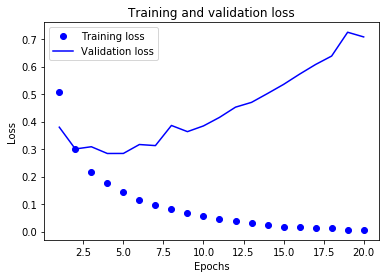

In [10]:
import matplotlib.pyplot as plt

history_dict = history.history
loss=history_dict['loss']
val_loss=history_dict['val_loss']

epochs=range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### 3-10 훈련과 검증 정확도 그리기

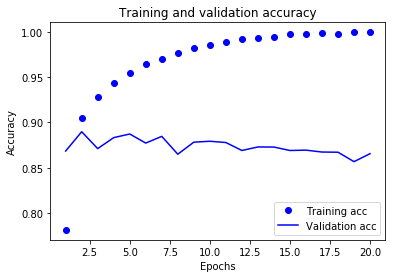

In [11]:
plt.clf()
acc=history_dict['acc']
val_acc=history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### 3-11 모델을 처음부터 다시 훈련하기

In [12]:
model=models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results=model.evaluate(x_test, y_test)

print(results)

Epoch 1/4
25000/25000 [==============================] - 2s 82us/step - loss: 0.4749 - acc: 0.8217
Epoch 2/4
25000/25000 [==============================] - 2s 69us/step - loss: 0.2658 - acc: 0.9097
Epoch 3/4
25000/25000 [==============================] - 2s 72us/step - loss: 0.1982 - acc: 0.9299
Epoch 4/4
25000/25000 [==============================] - 3s 103us/step
[0.32317298930168153, 0.87348]
